In [1]:
%load_ext autoreload
%autoreload 2

# Dataset Information and Statistics

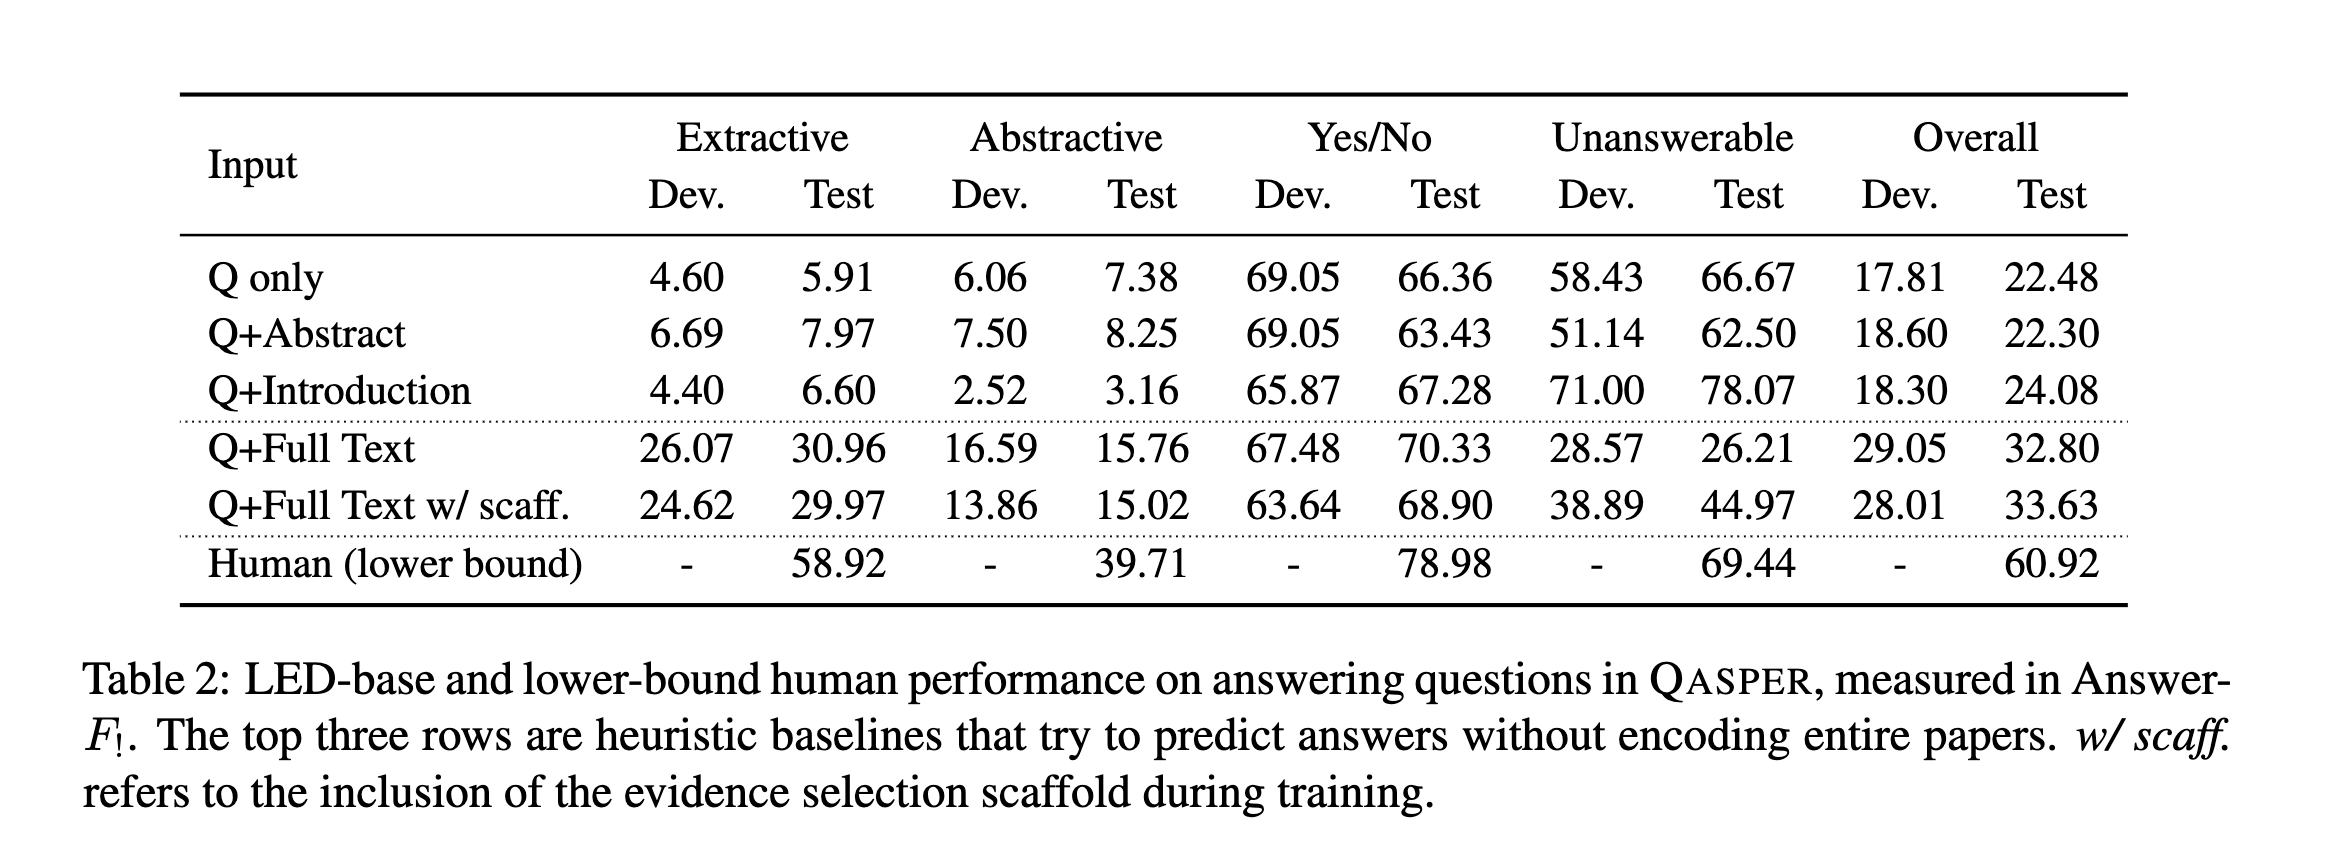

In [2]:
from datasets import load_dataset
dataset = load_dataset("allenai/qasper")
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'abstract', 'full_text', 'qas', 'figures_and_tables'],
        num_rows: 888
    })
    validation: Dataset({
        features: ['id', 'title', 'abstract', 'full_text', 'qas', 'figures_and_tables'],
        num_rows: 281
    })
    test: Dataset({
        features: ['id', 'title', 'abstract', 'full_text', 'qas', 'figures_and_tables'],
        num_rows: 416
    })
})


In [2]:
dataset['train'][0]['id']

'1909.00694'

In [3]:
dataset['train'][0]['title']

'Minimally Supervised Learning of Affective Events Using Discourse Relations'

In [4]:
dataset['train'][0]['abstract']

'Recognizing affective events that trigger positive or negative sentiment has a wide range of natural language processing applications but remains a challenging problem mainly because the polarity of an event is not necessarily predictable from its constituent words. In this paper, we propose to propagate affective polarity using discourse relations. Our method is simple and only requires a very small seed lexicon and a large raw corpus. Our experiments using Japanese data show that our method learns affective events effectively without manually labeled data. It also improves supervised learning results when labeled data are small.'

In [5]:
dataset['train'][0]['full_text'].keys()


dict_keys(['section_name', 'paragraphs'])

In [ ]:
# the paragraphs[i] is the paragraphs (separated by newlines) of a section
dataset['train'][0]['full_text']['paragraphs'][0]

["Affective events BIBREF0 are events that typically affect people in positive or negative ways. For example, getting money and playing sports are usually positive to the experiencers; catching cold and losing one's wallet are negative. Understanding affective events is important to various natural language processing (NLP) applications such as dialogue systems BIBREF1, question-answering systems BIBREF2, and humor recognition BIBREF3. In this paper, we work on recognizing the polarity of an affective event that is represented by a score ranging from $-1$ (negative) to 1 (positive).",
 'Learning affective events is challenging because, as the examples above suggest, the polarity of an event is not necessarily predictable from its constituent words. Combined with the unbounded combinatorial nature of language, the non-compositionality of affective polarity entails the need for large amounts of world knowledge, which can hardly be learned from small annotated data.',
 "In this paper, we 

In [ ]:
# check that len(paragraphs) == len(section_name), i.e. section names map one-to-one onto the list of (list of) paragraphs for a particular section
for i in range(len(dataset['train'])):
    assert len(dataset['train'][i]['full_text']['section_name']) == len(dataset['train'][i]['full_text']['paragraphs'])

In [ ]:
dataset['train'][0]['figures_and_tables']

{'caption': ['Figure 1: An overview of our method. We focus on pairs of events, the former events and the latter events, which are connected with a discourse relation, CAUSE or CONCESSION. Dropped pronouns are indicated by brackets in English translations. We divide the event pairs into three types: AL, CA, and CO. In AL, the polarity of a latter event is automatically identified as either positive or negative, according to the seed lexicon (the positive word is colored red and the negative word blue). We propagate the latter event’s polarity to the former event. The same polarity as the latter event is used for the discourse relation CAUSE, and the reversed polarity for CONCESSION. In CA and CO, the latter event’s polarity is not known. Depending on the discourse relation, we encourage the two events’ polarities to be the same (CA) or reversed (CO). Details are given in Section 3.2.',
  'Table 1: Statistics of the AL, CA, and CO datasets.',
  'Table 2: Details of the ACP dataset.',
  

# Passage Length Distribution

<BarContainer object of 20 artists>

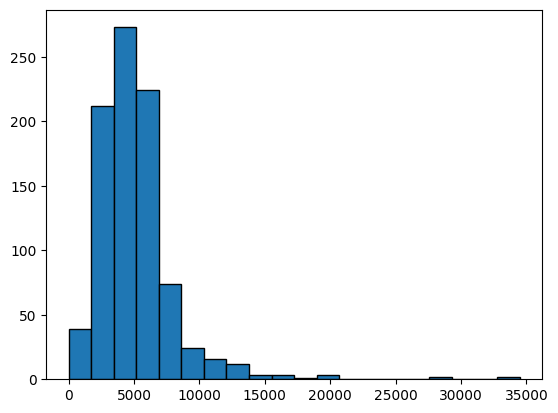

In [7]:
import numpy as np
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('meta-llama/Llama-3.1-8B-Instruct')
lengths = []
for i in range(len(dataset['train'])):
    lengths.append(len(tokenizer(" ".join(sum(dataset['train'][i]['full_text']['paragraphs'],[])))['input_ids']))

min_len = min(lengths)
max_len = max(lengths)
bins = np.linspace(min_len, max_len, 21)
counts, bins = np.histogram(lengths, bins=bins)
freq = counts / len(lengths)
import matplotlib.pyplot as plt
widths = np.diff(bins)
plt.bar(bins[:-1], counts, width=widths, align="edge", edgecolor="black")

# Question Count distribution

<BarContainer object of 20 artists>

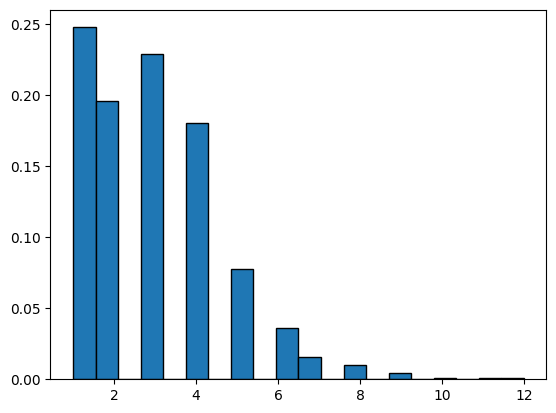

In [8]:
import numpy as np
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('meta-llama/Llama-3.1-8B-Instruct')
lengths = []
for i in range(len(dataset['train'])):
    lengths.append(len(dataset['train'][i]['qas']['question']))

min_len = min(lengths)
max_len = max(lengths)
bins = np.linspace(min_len, max_len, 21)
counts, bins = np.histogram(lengths, bins=bins)
freq = counts / len(lengths)
import matplotlib.pyplot as plt
widths = np.diff(bins)
plt.bar(bins[:-1], freq, width=widths, align="edge", edgecolor="black")

# Document Length Distribution Weighted by Question Count

<BarContainer object of 20 artists>

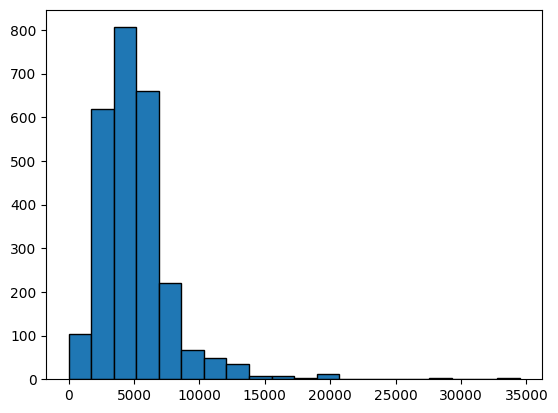

In [9]:
import numpy as np
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('meta-llama/Llama-3.1-8B-Instruct')
lengths = []
for i in range(len(dataset['train'])):
    lengths.extend([len(tokenizer(" ".join(sum(dataset['train'][i]['full_text']['paragraphs'],[])))['input_ids'])] * len(dataset['train'][i]['qas']['question']))

min_len = min(lengths)
max_len = max(lengths)
bins = np.linspace(min_len, max_len, 21)
counts, bins = np.histogram(lengths, bins=bins)
freq = counts / len(lengths)
import matplotlib.pyplot as plt
widths = np.diff(bins)
plt.bar(bins[:-1], counts, width=widths, align="edge", edgecolor="black")

# Scatter of Length vs Question Count

Text(0, 0.5, 'question counts')

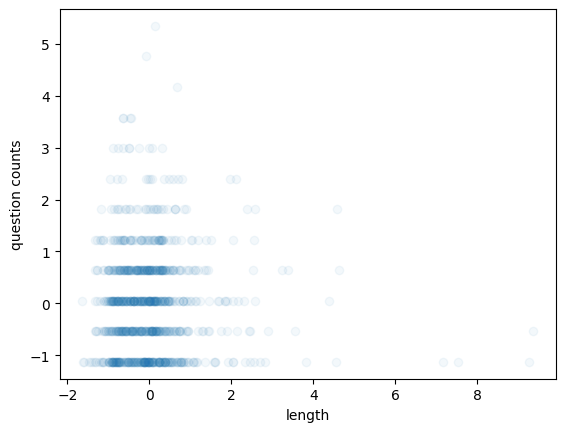

In [10]:
import numpy as np
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('meta-llama/Llama-3.1-8B-Instruct')
lengths = []
qcounts = []
for i in range(len(dataset['train'])):
    lengths.append(len(tokenizer(" ".join(sum(dataset['train'][i]['full_text']['paragraphs'],[])))['input_ids']))
    qcounts.append(len(dataset['train'][i]['qas']['question']))

lengths = np.array(lengths)
qcounts = np.array(qcounts)
plt.scatter((lengths - lengths.mean()) / lengths.std(), (qcounts - qcounts.mean()) / qcounts.std(), alpha=0.05)
plt.xlabel("length")
plt.ylabel("question counts")

# Check guarantees about questions

In [11]:
dataset['train']['qas'][0].keys()

dict_keys(['question', 'question_id', 'nlp_background', 'topic_background', 'paper_read', 'search_query', 'question_writer', 'answers'])

In [16]:
import json


i=0 # example
j=0 # question
k=0 # answer
for key in dataset['train']['qas'][0].keys():
    print(f'[{key}]', dataset['train']['qas'][i][key][j])

for key in dataset['train']['qas'][0]['answers'][0].keys():
    # answer for question j
    val = dataset['train']['qas'][i]['answers'][j][key][k]
    if isinstance(val, dict):
        val = json.dumps(val, indent=4)
    print(f'\t[answer.{key} {type(val)}]', val)


[question] What is the seed lexicon?
[question_id] 753990d0b621d390ed58f20c4d9e4f065f0dc672
[nlp_background] two
[topic_background] unfamiliar
[paper_read] no
[search_query] 
[question_writer] c1fbdd7a261021041f75fbe00a55b4c386ebbbb4
[answers] {'answer': [{'unanswerable': False, 'extractive_spans': [], 'yes_no': None, 'free_form_answer': 'a vocabulary of positive and negative predicates that helps determine the polarity score of an event', 'evidence': ['The seed lexicon consists of positive and negative predicates. If the predicate of an extracted event is in the seed lexicon and does not involve complex phenomena like negation, we assign the corresponding polarity score ($+1$ for positive events and $-1$ for negative events) to the event. We expect the model to automatically learn complex phenomena through label propagation. Based on the availability of scores and the types of discourse relations, we classify the extracted event pairs into the following three types.'], 'highlighted_ev

# Check for fields that encode type of question
* nonemtpy "free_form_answer"/"extractive_spans" and non-null "yes_no" indicates type of question

In [ ]:
import json
from tqdm.notebook import tqdm

train = dataset['train']
for i in tqdm(range(len(train))):
    example = train['qas'][i]
    for j, question in enumerate(example['question']):
        for answer in example['answers'][j]['answer']:
            has_freeform = len(answer['free_form_answer']) > 0
            has_extractive = len(answer['extractive_spans']) > 0
            unanswerable = answer['unanswerable']
            is_yes_no = answer['yes_no'] is not None
            ind = (is_yes_no + has_extractive + has_freeform)
            if unanswerable:
                assert ind == 0, (ind, question, answer)
            else:
                assert ind == 1, (ind, question, answer)
            evidences = answer['evidence']
            if len(evidences) > 0:
                assert all(isinstance(e, str) for e in evidences)


  0%|          | 0/888 [00:00<?, ?it/s]

# Evaluation Setup for LLMs

We will sample at temperature 1, and compute average RougeL score.
* Question
* Question + Abstract
* Question + Introduction
* Question + Full Paper
* Question + Abstract + Reason About Abstract (ours)

We will do some prompt engineering to see if we can get interesting thoughts about the paper that would predict answer to such questions ahead of time.

In [26]:
from collections import defaultdict
from tqdm.notebook import tqdm

def majority_vote(answers):
    # first vote by question type, then by answer if it's yes_no
    type_counter = defaultdict(int)
    answer_values = []
    for ans in answers:
        type_counter[ans['type']] += 1
        answer_values.append(ans[ans['type']])
    majority_type, majority_type_count = max(type_counter.items(), key=lambda x: x[1])
    
    # break ties by priority
    ties = [type for type, cnt in type_counter.items() if majority_type_count == cnt]
    if 'yes_no' in ties:
        majority_type = 'yes_no'
    elif 'extractive_spans' in ties:
        majority_type = 'extractive_spans'
    elif 'free_form_answer' in ties:
        majority_type = 'free_form_answer'
    
    if majority_type == 'yes_no':
        answer_counter = defaultdict(int)
        for ans in answers:
            if ans['type'] != majority_type:
                print(majority_type, type_counter, answer_values)
            answer_counter[ans['yes_no']] += 1
        majority_answer, _ = max(answer_counter.items(), key=lambda x: x[1])
    else:
        majority_answer = None
    return majority_type, majority_answer


def transform_dataset(split='train'):
    examples = []
    datasplit = dataset[split]
    for i in tqdm(range(len(datasplit))):
        article = datasplit[i]
        qas = datasplit['qas'][i]
        for j, question in enumerate(qas['question']):
            example = {}
            example['split'] = split
            example['title'] = article['title']
            example['id'] = article['id']
            example['abstract'] = article['abstract']
            example['full_text'] = article['full_text']
            example['figures_and_tables'] = article['figures_and_tables']
            example['question'] = question
            example['answers'] = []
            for answer in qas['answers'][j]['answer']:
                answer_example = {}
                has_freeform = len(answer['free_form_answer']) > 0
                has_extractive = len(answer['extractive_spans']) > 0
                unanswerable = answer['unanswerable']
                is_yes_no = answer['yes_no'] is not None
                has_figure_table = any(e.startswith("FLOAT SELECTED") for e in answer['evidence'])
                answer_example['unanswerable'] = unanswerable
                answer_example['free_form_answer'] = answer['free_form_answer']
                answer_example['extractive_spans'] = answer['extractive_spans']
                answer_example['yes_no'] = answer['yes_no']
                answer_example['evidence'] = answer['evidence']
                answer_example['highlighted_evidence'] = answer['highlighted_evidence']
                if is_yes_no:
                    answer_example['type'] = 'yes_no'
                elif has_extractive:
                    answer_example['type'] = 'extractive_spans' 
                elif has_freeform:
                    answer_example['type'] = 'free_form_answer'
                else:
                    assert unanswerable, answer
                    answer_example['type'] = 'unanswerable'
                answer_example['has_figure_table_evidence'] = has_figure_table
                if has_freeform:
                    answer_example['answer_unified'] = answer_example['free_form_answer']
                elif has_extractive:
                    answer_example['answer_unified'] = ','.join(answer_example['extractive_spans'])
                elif is_yes_no:
                    answer_example['answer_unified'] = 'Yes' if answer_example['yes_no'] else 'No'
                example['answers'].append(answer_example)
            majority_type, majority_answer = majority_vote(example['answers'])
            example['majority_type'] = majority_type
            example['majority_answer'] = majority_answer
            examples.append(example)
    return examples

from datasets import Dataset

for split in ['validation', 'test', 'train']:
    Dataset.from_list(transform_dataset(split=split)).to_parquet(f'data/qasper_{split}_flat.parquet')

  0%|          | 0/281 [00:00<?, ?it/s]

yes_no defaultdict(<class 'int'>, {'yes_no': 1, 'unanswerable': 1}) [True, True]
yes_no defaultdict(<class 'int'>, {'yes_no': 1, 'unanswerable': 1}) [True, True]
yes_no defaultdict(<class 'int'>, {'unanswerable': 1, 'yes_no': 1}) [True, True]
yes_no defaultdict(<class 'int'>, {'yes_no': 1, 'unanswerable': 1}) [False, True]
yes_no defaultdict(<class 'int'>, {'yes_no': 1, 'unanswerable': 1}) [False, True]
yes_no defaultdict(<class 'int'>, {'unanswerable': 1, 'yes_no': 1}) [True, True]
yes_no defaultdict(<class 'int'>, {'unanswerable': 1, 'yes_no': 1}) [True, False]
yes_no defaultdict(<class 'int'>, {'yes_no': 1, 'extractive_spans': 1}) [False, ['utilize the machinery of language modeling using deep neural networks to learn Dolores embeddings.']]
yes_no defaultdict(<class 'int'>, {'unanswerable': 1, 'yes_no': 1}) [True, False]
yes_no defaultdict(<class 'int'>, {'unanswerable': 1, 'yes_no': 1}) [True, False]
yes_no defaultdict(<class 'int'>, {'unanswerable': 1, 'yes_no': 1}) [True, False]


Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/416 [00:00<?, ?it/s]

yes_no defaultdict(<class 'int'>, {'yes_no': 4, 'free_form_answer': 1}) [True, True, True, 'Yes, consisting of trusted resources, rumours and non-rumours', True]
yes_no defaultdict(<class 'int'>, {'yes_no': 3, 'extractive_spans': 1}) [False, True, True, ['we achieve state-of-the-art performance among models without considering the pre-trained language models or designed features']]
yes_no defaultdict(<class 'int'>, {'unanswerable': 1, 'yes_no': 2}) [True, False, False]
yes_no defaultdict(<class 'int'>, {'yes_no': 3, 'free_form_answer': 1}) [True, True, True, "No, they used someone else's pretrained model. "]
yes_no defaultdict(<class 'int'>, {'yes_no': 3, 'extractive_spans': 1}) [True, True, True, ['we see that the gains are more pronounced in low resource languages']]
yes_no defaultdict(<class 'int'>, {'yes_no': 3, 'free_form_answer': 1}) [False, True, 'It is automatically created from the OpenSubtitles corpus.', True]
yes_no defaultdict(<class 'int'>, {'yes_no': 2, 'unanswerable': 1}

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/888 [00:00<?, ?it/s]

yes_no defaultdict(<class 'int'>, {'yes_no': 1, 'unanswerable': 1}) [False, True]
yes_no defaultdict(<class 'int'>, {'yes_no': 1, 'free_form_answer': 1}) [False, 'No, other baseline metrics they use besides ROUGE-L are n-gram overlap, negative cross-entropy, perplexity, and BLEU.']
yes_no defaultdict(<class 'int'>, {'free_form_answer': 1, 'yes_no': 1}) ['Yes, Open IE', True]


Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

# Subsample 100 answerable questions

In [25]:
from datasets import load_dataset, Dataset
train_questions = load_dataset('parquet', data_files='data/qasper_train_flat.parquet')['train']
train_questions = train_questions.filter(lambda x: x['majority_type'] != 'unanswerable' and not all(ans['has_figure_table_evidence'] for ans in x['answers']))
print(len(train_questions))
train_questions = train_questions.shuffle(seed=42)
train_questions_subsample = train_questions.select(list(range(100)))
train_questions_subsample.to_parquet('data/qasper_train_flat_first100_seed_42.parquet')
train_questions_subsample = train_questions.select(list(range(5)))
train_questions_subsample.to_parquet('data/qasper_train_flat_first5_seed_42.parquet')

Filter:   0%|          | 0/2593 [00:00<?, ? examples/s]

2011


Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

104417

# Prompting Workflow

In [7]:
import re


SYSTEM=r'''You are a helpful scientific research assistant. You will use your background knowledge about the subject area to help the user get through literature more efficiently by helping answer their questions about papers. You will always be given the title of a paper, but only sometimes the abstract and/or full text. Don't rely on search, only use what you remember about the reference and/or any relevant background knowledge. Do not refuse to answer - make use of the available information as best you can, and make your most informed guesses whenever necessary. Please put any of your thoughts in <thought></thought> and your final answer to the question in <answer></answer>. Be clear about what is your inference and what is based on the provided context in your thoughts (i.e. the title, abstract, or fulltext of the paper, if they are provided). Make sure the answer is succint and contains only answer to the question and no other commentary. Additional commentary should remain in the <thought></thought> section. '''
QUESTION=r'''I have a question about the following paper: {title}.

My question is this: {question}

'''
ABSTRACT=r'''Here is the abstract of the paper:
{abstract}

'''
INTRODUCTION=r'''Here is the introduction of the paper: 
{introduction}

'''
MAIN_TEXT=r'''Here is the main text of the paper:
{main_text}

'''

def format_messages(question, title, abstract=None, introduction=None, main_text=None):
    user = QUESTION.format(title=title, question=question)
    if abstract is not None:
        user += ABSTRACT.format(abstract=abstract)
    if introduction is not None:
        user += INTRODUCTION.format(introduction=introduction)
    if main_text is not None:
        user += MAIN_TEXT.format(main_text=main_text)
    messages = [{'role': 'system', 'content': SYSTEM},
                {'role': 'user', 'content': user}]
    return messages

def format_main_text(section_name, paragraphs):
    lines = []
    for section_name, paragraphs_of_section in zip(section_name, paragraphs):
        if section_name is None: 
            lines.append("")
        else:
            lines.append(section_name)
        for para in paragraphs_of_section:
            if para is None: 
                lines.append("")
            else:
                lines.append(para)
    return " ".join(lines)

def extract_answer(answer_str):
    answer = re.findall(r'<answer>(.*?)</answer>', answer_str, re.IGNORECASE | re.DOTALL)
    if answer:
        return answer[0]
    else:
        return ""

def extract_thought(thought_str):
    thought = re.findall(r'<thought>(.*?)</thought>', thought_str, re.IGNORECASE | re.DOTALL)
    if thought:
        return thought[0]
    else:
        return ""

from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(rouge_types=["rougeL"], use_stemmer=True)
def score_answer(answer_str, labels):
    return scorer.score_multi(labels, answer_str)['rougeL'].fmeasure

In [11]:
import os
from openai import OpenAI
from dotenv import load_dotenv
load_dotenv()
client = OpenAI()
def call_llm(client, messages, model='gpt-4.1-mini', temperature=1.0, max_completion_tokens=4096, n=1):
    if 'o3' in model or 'o4' in model:
        output = client.chat.completions.create(model=model, messages=messages, max_completion_tokens=max_completion_tokens, n=n) # reasonining models don't get temperature
    else:
        output = client.chat.completions.create(model=model, messages=messages, max_completion_tokens=max_completion_tokens, temperature=temperature, n=n)
    return [c.message.content for c in output.choices]

In [9]:
from concurrent.futures import ThreadPoolExecutor
from datasets import load_dataset, Dataset
from tqdm.notebook import tqdm

def run_inference(dataset: Dataset, mode, client, model, temperature, max_completion_tokens, n, out_file, max_workers=8):
    output_dataset = []
    futures = []
    with ThreadPoolExecutor(max_workers=max_workers) as pool:
        for example in dataset.select(range(len(dataset))):
            question = example['question']
            title = example['title']
            abstract = example['abstract']
            full_text = example['full_text']
            section_name, paragraphs = full_text['section_name'], full_text['paragraphs']
            main_text_str = format_main_text(section_name, paragraphs)
            if 'generations' not in example:
                example['generations'] = []
            generation = {
                'mode': mode,
                'model': model,
                'temperature': temperature,
                'max_completion_tokens': max_completion_tokens,
                'n': n,
            }
            example['generations'].append(generation)
            if mode == 'title':
                messages = format_messages(question, title)
            elif mode == 'abstract':
                messages = format_messages(question, title, abstract=abstract)
            elif mode == 'fulltext':
                messages = format_messages(question, title, abstract=abstract, main_text=main_text_str)
            else:
                raise ValueError(f'Unknown mode: {mode}')
            futures.append(pool.submit(call_llm, client, messages, model, temperature=temperature, max_completion_tokens=max_completion_tokens, n=n))
            output_dataset.append(example)
    for example, future in tqdm(zip(output_dataset, futures)):
        example['generations'][-1]['content'] = future.result()
    Dataset.from_list(output_dataset).to_parquet(out_file)

In [10]:
# data = load_dataset('parquet', data_files='data/qasper_train_flat_first5_seed_42.parquet')['train']
# run_inference(data, mode='title', client=client, model='gpt-4.1-mini', max_completion_tokens=4096, temperature=0.7, n=1, out_file='generations/qasper_train_flat_first5_seed_42.parquet')

# data = load_dataset('parquet', data_files='data/qasper_train_flat_first100_seed_42.parquet')['train']
# run_inference(data, mode='title', client=client, model='gpt-4.1-mini', max_completion_tokens=4096, temperature=0.7, n=3, out_file='generations/qasper_train_flat_first100_seed_42.parquet')

# data = load_dataset('parquet', data_files='generations/qasper_train_flat_first100_seed_42.parquet')['train']
# run_inference(data, mode='abstract', client=client, model='gpt-4.1-mini', max_completion_tokens=4096, temperature=0.7, n=3, out_file='generations/qasper_train_flat_first100_seed_42.abstract.parquet')

data = load_dataset('parquet', data_files='generations/qasper_train_flat_first100_seed_42.abstract.parquet')['train']
run_inference(data, mode='fulltext', client=client, model='gpt-4.1-mini', max_completion_tokens=4096, temperature=0.7, n=3, out_file='generations/qasper_train_flat_first100_seed_42.fulltext.parquet')

0it [00:00, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
# from datasets import load_dataset, Dataset
# train_questions = load_dataset('parquet', data_files='data/qasper_train_flat.parquet')['train']
# def strided_subsample(dataset, stride=10):
#     return Dataset.from_list([dataset[i] for i in range(0, len(dataset), stride)])
# train_questions = strided_subsample(train_questions)
# i = 11
# example = train_questions[i]
# messages = format_messages(example['question'], example['title'])
# llm_answer = call_llm(messages)[0]
# labels = [ans['answer_unified'] for ans in example['answers'] if ans['type'] == example['majority_type']]
# print(llm_answer)
# print(example['question'])
# print(example['majority_type'])
# print(example['majority_answer'])
# print(labels) 
# print(score_answer(llm_answer, labels))

<thought>Based on the title "Enriching BERT with Knowledge Graph Embeddings for Document Classification," it suggests that the authors use BERT to obtain textual embeddings and then integrate or combine these embeddings with knowledge graph embeddings to improve document classification. Common approaches to combining BERT embeddings with knowledge graph embeddings include concatenation of vectors, attention mechanisms, or feeding joint embeddings into a downstream classifier. Without the abstract or full text, the most typical and straightforward method is concatenating the BERT-derived text representation with the knowledge graph embedding and then passing this combined vector into a classification layer.</thought>

<answer>They combine text representations from BERT with knowledge graph embeddings by concatenating the two embedding vectors to form a joint representation, which is then used for document classification.</answer>
How do they combine text representations with the knowled

# check the answer

In [22]:
dataset = load_dataset('parquet', data_files='generations/qasper_train_flat_first5_seed_42.parquet')['train']
dataset[1]

{'split': 'train',
 'title': 'Few-shot Natural Language Generation for Task-Oriented Dialog',
 'id': '2002.12328',
 'abstract': 'As a crucial component in task-oriented dialog systems, the Natural Language Generation (NLG) module converts a dialog act represented in a semantic form into a response in natural language. The success of traditional template-based or statistical models typically relies on heavily annotated data, which is infeasible for new domains. Therefore, it is pivotal for an NLG system to generalize well with limited labelled data in real applications. To this end, we present FewShotWoz, the first NLG benchmark to simulate the few-shot learning setting in task-oriented dialog systems. Further, we develop the SC-GPT model. It is pre-trained on a large set of annotated NLG corpus to acquire the controllable generation ability, and fine-tuned with only a few domain-specific labels to adapt to new domains. Experiments on FewShotWoz and the large Multi-Domain-WOZ datasets s